Scrape Data for the Highest Income Urban Neighborhoods in the US  
Data Source: Wikipedia

In [200]:
import urllib.request

url = "https://en.wikipedia.org/wiki/List_of_highest-income_urban_neighborhoods_in_the_United_States"
page = urllib.request.urlopen(url)

from bs4 import BeautifulSoup

soup = BeautifulSoup(page, "lxml")

In [201]:
all_tables=soup.find_all("table")

In [202]:
right_table=soup.find('table', class_='wikitable sortable')

In [203]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==9:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        I.append(cells[8].find(text=True))
        

In [204]:
import pandas as pd
df=pd.DataFrame(A,columns=['Neighborhood'])
df['Metropolitan Area']=B
df['State']=C
df['Income']=D


Construct a Dataframe containing Information of the Highest Income Urban Neighborhoods in the US

In [205]:
df

,Neighborhood,Metropolitan Area,State,Income
0,Grove Isle,Miami,FL,"$506,683\n"
1,Cherry Hills Village,Denver,CO,"$390,750\n"
2,Sutton Place,New York,NY,"$176,980\n"
3,Old Town,Washington,VA,"$169,658\n"
4,Tribeca,New York,NY,"$163,425\n"
...,...,...,...,...
61,Central Gardens,Memphis,TN,"$82,620\n"
62,Queen Anne Hill,Seattle,WA,"$82,420\n"
63,Mount Adams,Cincinnati,OH,"$82,073\n"
64,Summit Hill,St. Paul,MN,"$78,166\n"


In [206]:
columns=['Neighborhood','Metropolitan Area','State','Income']
df_all = df[columns].replace('\\n','', regex=True)

In [207]:
column_names = ['Neighborhood', 'Metropolitan Area', 'State', 'Income', 'Latitude', 'Longitude'] 

# instantiate the dataframe
df_main = pd.DataFrame(columns=column_names)

Get the Latitude and Longitude of the Neighborhoods using Geolocator

Note: I had to call Geocoders multiple times to get the data on location

In [208]:
df_1=df_all[:8]

In [209]:
from geopy.geocoders import Nominatim

In [210]:
for neighborhood, metro, state, income in zip(df_1['Neighborhood'], df_1['Metropolitan Area'], df_1['State'], df_1['Income']): 

    address ='{}, {}, {}'.format(neighborhood, metro, state)

    geolocator = Nominatim(user_agent="us_explorer")
    location = geolocator.geocode(address)
    if location != None:
        latitude = location.latitude
        longitude = location.longitude
        df_main = df_main.append({'Neighborhood': neighborhood, 'Metropolitan Area': metro, 'State': state, 'Income' : income, 'Latitude': latitude, 'Longitude': longitude}, ignore_index=True)

In [211]:
df_2=df_all.loc[9:18,:]

In [212]:
for neighborhood, metro, state, income in zip(df_2['Neighborhood'], df_2['Metropolitan Area'], df_2['State'], df_2['Income']): 

    address ='{}, {}, {}'.format(neighborhood, metro, state)

    geolocator = Nominatim(user_agent="us_explorer")
    location = geolocator.geocode(address)
    if location != None:
        latitude = location.latitude
        longitude = location.longitude
        df_main = df_main.append({'Neighborhood': neighborhood, 'Metropolitan Area': metro, 'State': state, 'Income' : income, 'Latitude': latitude, 'Longitude': longitude}, ignore_index=True)

In [213]:
df_3=df_all.loc[20:66,:]

In [214]:
for neighborhood, metro, state, income in zip(df_3['Neighborhood'], df_3['Metropolitan Area'], df_3['State'], df_3['Income']): 

    address ='{}, {}, {}'.format(neighborhood, metro, state)

    geolocator = Nominatim(user_agent="us_explorer")
    location = geolocator.geocode(address)
    if location != None:
        latitude = location.latitude
        longitude = location.longitude
        df_main = df_main.append({'Neighborhood': neighborhood, 'Metropolitan Area': metro, 'State': state, 'Income' : income, 'Latitude': latitude, 'Longitude': longitude}, ignore_index=True)

Constrauct a new Dataframe containg infomration of the Neighborhoods and their Latitudes and Longitudes 

In [215]:
df_main

,Neighborhood,Metropolitan Area,State,Income,Latitude,Longitude
0,Grove Isle,Miami,FL,"$506,683",25.735496,-80.218680
1,Cherry Hills Village,Denver,CO,"$390,750",39.641654,-104.959425
2,Sutton Place,New York,NY,"$176,980",41.114852,-72.371285
3,Old Town,Washington,VA,"$169,658",48.150371,-123.151290
4,Tribeca,New York,NY,"$163,425",40.715380,-74.009306
5,Pacific Heights,San Francisco,CA,"$158,937",37.792717,-122.435644
6,The Gold Coast,Chicago,IL,"$153,358",41.906699,-87.625331
7,Georgetown,Washington,DC,"$152,209",38.905199,-77.062785
8,Battery Park,New York,NY,"$150,075",40.703012,-74.015825
9,Upper East Side,New York,NY,"$143,323",40.773702,-73.964120


Export the Dataframe to Excelsheet to Review the data and add 6 missing latitudes and longitudes that Geolocator was not able to find

In [216]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('TopUS.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
df_main.to_excel(writer, sheet_name='All')
# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [217]:
!pip install xlrd 

In [241]:
df_main=pd.read_excel('/Users/shayan/Desktop/IBM Data Science/TopUS.xlsx')

In [242]:
del df_main['Unnamed: 0']

In [243]:
df_main

,Neighborhood,Metropolitan Area,State,Income,Latitude,Longitude
0,Grove Isle,Miami,FL,506683,25.735496,-80.218680
1,Cherry Hills Village,Denver,CO,390750,39.641654,-104.959425
2,Sutton Place,New York,NY,176980,41.114852,-72.371285
3,Old Town,Washington,VA,169658,48.150371,-123.151290
4,Tribeca,New York,NY,163425,40.715380,-74.009306
...,...,...,...,...,...,...
61,Central Gardens,Memphis,TN,82620,35.149022,-90.051629
62,Queen Anne Hill,Seattle,WA,82420,47.631337,-122.354753
63,Mount Adams,Cincinnati,OH,82073,39.107553,-84.499111
64,Summit Hill,St. Paul,MN,78166,44.939900,-93.136400


Plot the Neighborhoods on the US map based on their Latitudes and Longitudes

In [341]:
#get the geographical coordinates of United States

address = 'United States'

geolocator = Nominatim(user_agent="us_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of the US are {}, {}.'.format(latitude, longitude))

The geographical coordinate of the US are 39.7837304, -100.4458825.


Display neighborhoods on the US map

In [352]:
#let's visualizat Manhattan and the neighborhoods in it

import folium

# create map of Manhattan using latitude and longitude values
map_us = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_main['Latitude'], df_main['Longitude'], df_main['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_us)  
    
map_us

Retrieve Data for the Venues of the Neighborhoods  
Methodology: Foursquare API

I deleted the credentials after running the code!!

In [ ]:
#utilize the Foursquare API to explore the neighborhoods and segment them

#Define Foursquare Credentials and Version

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [258]:
#Explore Neighborhoods 


LIMIT = 30

import requests

def getNearbyVenues(names, city, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, city, lat, lng in zip(names, city, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            city,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Metropolitan Area',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [259]:
us_venues = getNearbyVenues(names=df_main['Neighborhood'], city=df_main['Metropolitan Area'],
                                   latitudes=df_main['Latitude'],
                                   longitudes=df_main['Longitude']
                                  )

In [260]:
us_venues

,Neighborhood,Metropolitan Area,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Grove Isle,Miami,25.735496,-80.218680,Palmeiras Beach Club at Grove Isle,25.736288,-80.217106,Mediterranean Restaurant
1,Grove Isle,Miami,25.735496,-80.218680,The Tennis Center at Grove Isle,25.736139,-80.219146,Tennis Court
2,Grove Isle,Miami,25.735496,-80.218680,Baleen,25.736576,-80.217452,American Restaurant
3,Grove Isle,Miami,25.735496,-80.218680,Tiki Bar,25.736021,-80.217234,Resort
4,Grove Isle,Miami,25.735496,-80.218680,Grove Isle Marina,25.736286,-80.218323,Harbor / Marina
...,...,...,...,...,...,...,...,...
1645,French Quarter,New Orleans,29.959506,-90.065567,Lafitte's Blacksmith Shop,29.961006,-90.063571,Dive Bar
1646,French Quarter,New Orleans,29.959506,-90.065567,Boondock Saint,29.958428,-90.065406,Bar
1647,French Quarter,New Orleans,29.959506,-90.065567,Johnny Whites,29.958433,-90.065671,Bar
1648,French Quarter,New Orleans,29.959506,-90.065567,Erzulie's Voodoo Shop,29.959145,-90.063997,Gift Shop


In [261]:
#check how many venues were returned for each neighborhood
us_venues.groupby(['Metropolitan Area','Neighborhood']).count()

Neighborhood Latitude  \
Metropolitan Area Neighborhood                           
 Atlanta          Buckhead                          30   
 Boston           Back Bay                          30   
                  Beacon Hill                       30   
                  Boston Harbor                      3   
                  South End                         30   
...                                                ...   
Los Angeles       Diamond Bar                        8   
                  Marina                            21   
Miami             Grove Isle                         5   
San Francisco     Marina                            30   
St. Paul          Summit Hill                       30   

                                 Neighborhood Longitude  Venue  \
Metropolitan Area Neighborhood                                   
 Atlanta          Buckhead                           30     30   
 Boston           Back Bay                           30     30   
                  Beacon Hill                        30     30   
                  Boston Harbor                       3      3   
                  South End                          30     30   
...                                                 ...    ...   
Los Angeles       Diamond Bar                         8      8   
                  Marina                             21     21   
Miami             Grove Isle                          5      5   
San Francisco     Marina                             30     30   
St. Paul          Summit Hill                        30     30   

                                 Venue Latitude  Venue Longitude  \
Metropolitan Area Neighborhood                                     
 Atlanta          Buckhead                   30               30   
 Boston           Back Bay                   30               30   
                  Beacon Hill                30               30   
                  Boston Harbor               3                3   
                  South End                  30               30   
...                                         ...              ...   
Los Angeles       Diamond Bar                 8                8   
                  Marina                     21               21   
Miami             Grove Isle                  5                5   
San Francisco     Marina                     30               30   
St. Paul          Summit Hill                30               30   

                                 Venue Category  
Metropolitan Area Neighborhood                   
 Atlanta          Buckhead                   30  
 Boston           Back Bay                   30  
                  Beacon Hill                30  
                  Boston Harbor               3  
                  South End                  30  
...                                         ...  
Los Angeles       Diamond Bar                 8  
                  Marina                     21  
Miami             Grove Isle                  5  
San Francisco     Marina                     30  
St. Paul          Summit Hill                30  

[66 rows x 6 columns]

In [262]:
# one hot encoding
us_onehot = pd.get_dummies(us_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
us_onehot['Metropolitan Area'] = us_venues['Metropolitan Area'] 
us_onehot['Neighborhood'] = us_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [us_onehot.columns[-1]] + list(us_onehot.columns[:-1])
us_onehot = us_onehot[fixed_columns]

us_onehot.head()

,Metropolitan Area,Acai House,Accessories Store,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Miami,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Miami,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Miami,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Miami,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Miami,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
us_grouped = us_onehot.groupby('Neighborhood').mean().reset_index()
us_grouped

,Neighborhood,Acai House,Accessories Store,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Georgetown,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.033333,0.033333
1,Old Town,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,Back Bay,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,Battery Park,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,Beacon Hill,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,The Loop,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
60,The Near North,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.033333
61,Tribeca,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.000000
62,Upper East Side,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


Find the top 5 most common venues for each neighborhood

In [355]:
#print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in us_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = us_grouped[us_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Georgetown----
                 venue  freq
0          Coffee Shop  0.10
1         Dessert Shop  0.07
2  American Restaurant  0.07
3           Shoe Store  0.07
4               Bakery  0.07


---- Old Town----
                     venue  freq
0                    Beach  0.67
1                    Hotel  0.33
2  North Indian Restaurant  0.00
3        Outdoor Sculpture  0.00
4        Other Repair Shop  0.00


----Back Bay----
                venue  freq
0                 Spa  0.07
1               Plaza  0.07
2  Seafood Restaurant  0.07
3      Ice Cream Shop  0.07
4          Steakhouse  0.03


----Battery Park----
                 venue  freq
0         Cocktail Bar  0.10
1                 Park  0.10
2   Seafood Restaurant  0.07
3   Mexican Restaurant  0.07
4  Monument / Landmark  0.07


----Beacon Hill----
                venue  freq
0  Italian Restaurant  0.10
1         Pizza Place  0.10
2   French Restaurant  0.07
3         Yoga Studio  0.03
4              Bakery  0.03


----Boston H

In [265]:
#put that into a pandas dataframe

#write a function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [356]:
#create the new dataframe and display the top 10 venues for each neighborhood

import numpy as np

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
us_venues_sorted = pd.DataFrame(columns=columns)
us_venues_sorted['Neighborhood'] = us_grouped['Neighborhood']

for ind in np.arange(us_grouped.shape[0]):
    us_venues_sorted.iloc[ind, 1:] = return_most_common_venues(us_grouped.iloc[ind, :], num_top_venues)

us_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Georgetown,Coffee Shop,Shoe Store,American Restaurant,Dessert Shop,Tea Room
1,Old Town,Beach,Hotel,Yoga Studio,Flower Shop,Falafel Restaurant
2,Back Bay,Ice Cream Shop,Plaza,Spa,Seafood Restaurant,Hotel
3,Battery Park,Park,Cocktail Bar,Seafood Restaurant,Monument / Landmark,Pizza Place
4,Beacon Hill,Pizza Place,Italian Restaurant,French Restaurant,Yoga Studio,Plaza
...,...,...,...,...,...,...
59,The Loop,Hotel,Concert Hall,Museum,Liquor Store,Garden
60,The Near North,Hotel,Coffee Shop,Steakhouse,Speakeasy,Bar
61,Tribeca,Hotel,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Park
62,Upper East Side,Hotel,Coffee Shop,Playground,French Restaurant,Italian Restaurant


In [357]:
us_final=pd.merge(us_venues_sorted, df_main, on= 'Neighborhood')

In [358]:
us_final

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Metropolitan Area,State,Income,Latitude,Longitude
0,Georgetown,Coffee Shop,Shoe Store,American Restaurant,Dessert Shop,Tea Room,Washington,DC,152209,38.905199,-77.062785
1,Old Town,Beach,Hotel,Yoga Studio,Flower Shop,Falafel Restaurant,Washington,VA,169658,48.150371,-123.151290
2,Back Bay,Ice Cream Shop,Plaza,Spa,Seafood Restaurant,Hotel,Boston,MA,122731,42.350707,-71.079730
3,Battery Park,Park,Cocktail Bar,Seafood Restaurant,Monument / Landmark,Pizza Place,New York,NY,150075,40.703012,-74.015825
4,Beacon Hill,Pizza Place,Italian Restaurant,French Restaurant,Yoga Studio,Plaza,Boston,MA,109569,42.358708,-71.067829
...,...,...,...,...,...,...,...,...,...,...,...
61,The Loop,Hotel,Concert Hall,Museum,Liquor Store,Garden,Chicago,IL,91033,41.875562,-87.624421
62,The Near North,Hotel,Coffee Shop,Steakhouse,Speakeasy,Bar,Chicago,IL,105586,41.896471,-87.635719
63,Tribeca,Hotel,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Park,New York,NY,163425,40.715380,-74.009306
64,Upper East Side,Hotel,Coffee Shop,Playground,French Restaurant,Italian Restaurant,New York,NY,143323,40.773702,-73.964120


In [359]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('NeighborhoodVenues.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
us_final.to_excel(writer, sheet_name='All')
# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [269]:
neworder = ['Neighborhood','Metropolitan Area','State','Income','1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']
us_venue_income=us_final.reindex(columns=neworder)

In [270]:
us_venue_income

,Neighborhood,Metropolitan Area,State,Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Georgetown,Washington,DC,152209,Coffee Shop,Shoe Store,American Restaurant
1,Old Town,Washington,VA,169658,Beach,Hotel,Yoga Studio
2,Back Bay,Boston,MA,122731,Ice Cream Shop,Plaza,Spa
3,Battery Park,New York,NY,150075,Park,Cocktail Bar,Seafood Restaurant
4,Beacon Hill,Boston,MA,109569,Pizza Place,Italian Restaurant,French Restaurant
...,...,...,...,...,...,...,...
61,The Loop,Chicago,IL,91033,Hotel,Concert Hall,Museum
62,The Near North,Chicago,IL,105586,Hotel,Coffee Shop,Steakhouse
63,Tribeca,New York,NY,163425,Hotel,Coffee Shop,Cocktail Bar
64,Upper East Side,New York,NY,143323,Hotel,Coffee Shop,Playground


Sort the data based on the average income of the neighborhood

In [271]:
us_venue_income_sorted = us_venue_income.sort_values(by ='Income' , ascending=False).reset_index(drop=True)

In [272]:
us_venue_income_sorted

,Neighborhood,Metropolitan Area,State,Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Grove Isle,Miami,FL,506683,Mediterranean Restaurant,American Restaurant,Tennis Court
1,Cherry Hills Village,Denver,CO,390750,Other Repair Shop,Food Service,Pool
2,Sutton Place,New York,NY,176980,American Restaurant,Beach,Construction & Landscaping
3,Old Town,Washington,VA,169658,Beach,Hotel,Yoga Studio
4,Tribeca,New York,NY,163425,Hotel,Coffee Shop,Cocktail Bar
...,...,...,...,...,...,...,...
61,Central Gardens,Memphis,TN,82620,Hotel,Park,Coffee Shop
62,Queen Anne Hill,Seattle,WA,82420,Bus Stop,Park,Playground
63,Mount Adams,Cincinnati,OH,82073,Bar,American Restaurant,Ice Cream Shop
64,Summit Hill,St. Paul,MN,78166,Pizza Place,Arts & Crafts Store,Coffee Shop


In [280]:
chicago_top_venue= us_venue_income[us_venue_income['Metropolitan Area'].str.contains('Chicago')]

In [281]:
chicago_top_venue

,Neighborhood,Metropolitan Area,State,Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
15,Dearborn Park,Chicago,IL,88482,Yoga Studio,Pizza Place,Gym / Fitness Center
28,Lake Shore East,Chicago,IL,122145,Hotel,Hotel Bar,Seafood Restaurant
29,Lincoln Park,Chicago,IL,115856,Harbor / Marina,Boat or Ferry,Park
37,Near West Side,Chicago,IL,86168,Sports Bar,Bar,Donut Shop
40,Old Town,Chicago,IL,104060,Food Truck,Pizza Place,Gym
46,River North,Chicago,IL,100607,Sushi Restaurant,Hotel,Coffee Shop
49,Sandberg Village,Chicago,IL,95876,Italian Restaurant,Gym,Café
55,Streeterville,Chicago,IL,107276,Hotel,American Restaurant,Donut Shop
60,The Gold Coast,Chicago,IL,153358,Italian Restaurant,Café,Coffee Shop
61,The Loop,Chicago,IL,91033,Hotel,Concert Hall,Museum


In [292]:
chicago_top_venue['1st Most Common Venue'].value_counts()

Hotel                 4
Italian Restaurant    2
Harbor / Marina       1
Food Truck            1
Sushi Restaurant      1
Sports Bar            1
Yoga Studio           1
Name: 1st Most Common Venue, dtype: int64

In [282]:
newyork_top_venue= us_venue_income[us_venue_income['Metropolitan Area'].str.contains('New York')]

In [283]:
newyork_top_venue

,Neighborhood,Metropolitan Area,State,Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
3,Battery Park,New York,NY,150075,Park,Cocktail Bar,Seafood Restaurant
7,Brooklyn Heights,New York,NY,116952,Yoga Studio,Pet Store,Mexican Restaurant
10,Central Park South,New York,NY,141085,Hotel,Italian Restaurant,Concert Hall
14,Cobble Hill,New York,NY,128123,Yoga Studio,Food & Drink Shop,Bar
18,Downtown,New York,NY,106745,Pizza Place,Pub,Gym
23,Gramercy,New York,NY,90000,Park,Ice Cream Shop,Pizza Place
24,Greenwich Village,New York,NY,112546,Coffee Shop,Italian Restaurant,American Restaurant
33,Midtown,New York,NY,86427,Hotel,Art Museum,French Restaurant
34,Midtown East,New York,NY,129650,Hotel,Coffee Shop,Salon / Barbershop
36,Murray Hill,New York,NY,105821,Korean Restaurant,Asian Restaurant,Coffee Shop


In [293]:
newyork_top_venue['1st Most Common Venue'].value_counts()

Hotel                       5
Park                        2
Yoga Studio                 2
Pizza Place                 1
Scenic Lookout              1
Mediterranean Restaurant    1
Coffee Shop                 1
Wine Bar                    1
American Restaurant         1
Korean Restaurant           1
Bar                         1
Name: 1st Most Common Venue, dtype: int64

In [297]:
state_income=us_venue_income[['State', 'Income']].groupby('State').sum()

In [301]:
state_income_sorted=state_income.sort_values(by ='Income' , ascending=False)

In [302]:
state_income_sorted

,Income
State,
NY,2075768
CA,1318537
IL,1170447
PA,521970
FL,506683
MA,443320
CO,390750
DC,292366
FL,225982


In [303]:
NY_state_top_venue= us_venue_income[us_venue_income['State'].str.contains('NY')]

In [304]:
NY_state_top_venue

,Neighborhood,Metropolitan Area,State,Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
3,Battery Park,New York,NY,150075,Park,Cocktail Bar,Seafood Restaurant
7,Brooklyn Heights,New York,NY,116952,Yoga Studio,Pet Store,Mexican Restaurant
10,Central Park South,New York,NY,141085,Hotel,Italian Restaurant,Concert Hall
14,Cobble Hill,New York,NY,128123,Yoga Studio,Food & Drink Shop,Bar
18,Downtown,New York,NY,106745,Pizza Place,Pub,Gym
23,Gramercy,New York,NY,90000,Park,Ice Cream Shop,Pizza Place
24,Greenwich Village,New York,NY,112546,Coffee Shop,Italian Restaurant,American Restaurant
33,Midtown,New York,NY,86427,Hotel,Art Museum,French Restaurant
34,Midtown East,New York,NY,129650,Hotel,Coffee Shop,Salon / Barbershop
36,Murray Hill,New York,NY,105821,Korean Restaurant,Asian Restaurant,Coffee Shop


In [322]:
NY_state_top_venue_valuecount=pd.DataFrame(NY_state_top_venue['1st Most Common Venue'].value_counts())

In [323]:
NY_state_top_venue_valuecount

,1st Most Common Venue
Hotel,5
Park,2
Yoga Studio,2
Pizza Place,1
Scenic Lookout,1
Mediterranean Restaurant,1
Coffee Shop,1
Wine Bar,1
American Restaurant,1
Korean Restaurant,1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


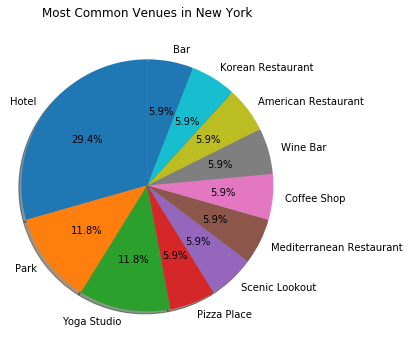

In [336]:

#Plot
# autopct create %, start angle represent starting point

import matplotlib as mpl
import matplotlib.pyplot as plt
NY_state_top_venue_valuecount['1st Most Common Venue'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Most Common Venues in New York')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.axes().set_ylabel('')

plt.show()

In [306]:
CA_state_top_venue= us_venue_income[us_venue_income['State'].str.contains('CA')]

In [307]:
CA_state_top_venue

,Neighborhood,Metropolitan Area,State,Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
16,Diamond Bar,Los Angeles,CA,89845,Fast Food Restaurant,Fried Chicken Joint,American Restaurant
26,Haight-Ashbury,San Francisco,CA,82713,Bookstore,Breakfast Spot,Shoe Store
30,Marina,Los Angeles,CA,151934,Gym / Fitness Center,Tennis Court,Harbor / Marina
31,Marina,San Francisco,CA,124750,Gym / Fitness Center,Tennis Court,Harbor / Marina
38,Nob Hill,San Francisco,CA,108870,Italian Restaurant,Grocery Store,Hotel
39,Noe Valley,San Francisco,CA,105335,Bookstore,Bakery,Sushi Restaurant
41,Pacific Heights,San Francisco,CA,158937,Sandwich Place,Ice Cream Shop,Coffee Shop
48,Russian Hill,San Francisco,CA,114645,Park,Italian Restaurant,Playground
53,South of Market,San Francisco,CA,117921,Pizza Place,Gym / Fitness Center,Coffee Shop
58,Telegraph Hill,San Francisco,CA,133977,Pizza Place,Coffee Shop,Scenic Lookout


In [325]:
CA_state_top_venue_Valuecount=pd.DataFrame(CA_state_top_venue['1st Most Common Venue'].value_counts())

In [326]:
CA_state_top_venue_Valuecount

,1st Most Common Venue
Pizza Place,2
Gym / Fitness Center,2
Bookstore,2
Sandwich Place,1
Park,1
Fast Food Restaurant,1
Coffee Shop,1
Italian Restaurant,1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


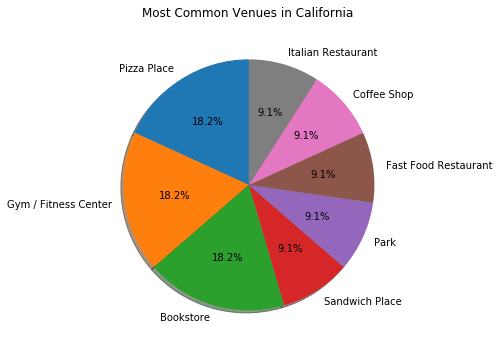

In [335]:
#Plot
# autopct create %, start angle represent starting point

import matplotlib as mpl
import matplotlib.pyplot as plt
CA_state_top_venue_Valuecount['1st Most Common Venue'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                             
                            shadow=True,       # add shadow      
                            )

plt.title('Most Common Venues in California')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.axes().set_ylabel('')

plt.show()

In [309]:
IL_state_top_venue= us_venue_income[us_venue_income['State'].str.contains('IL')]

In [310]:
IL_state_top_venue

,Neighborhood,Metropolitan Area,State,Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
15,Dearborn Park,Chicago,IL,88482,Yoga Studio,Pizza Place,Gym / Fitness Center
28,Lake Shore East,Chicago,IL,122145,Hotel,Hotel Bar,Seafood Restaurant
29,Lincoln Park,Chicago,IL,115856,Harbor / Marina,Boat or Ferry,Park
37,Near West Side,Chicago,IL,86168,Sports Bar,Bar,Donut Shop
40,Old Town,Chicago,IL,104060,Food Truck,Pizza Place,Gym
46,River North,Chicago,IL,100607,Sushi Restaurant,Hotel,Coffee Shop
49,Sandberg Village,Chicago,IL,95876,Italian Restaurant,Gym,Café
55,Streeterville,Chicago,IL,107276,Hotel,American Restaurant,Donut Shop
60,The Gold Coast,Chicago,IL,153358,Italian Restaurant,Café,Coffee Shop
61,The Loop,Chicago,IL,91033,Hotel,Concert Hall,Museum


In [337]:
IL_state_top_venue_Valuecount=pd.DataFrame(IL_state_top_venue['1st Most Common Venue'].value_counts())

In [338]:
IL_state_top_venue_Valuecount

,1st Most Common Venue
Hotel,4
Italian Restaurant,2
Harbor / Marina,1
Food Truck,1
Sushi Restaurant,1
Sports Bar,1
Yoga Studio,1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


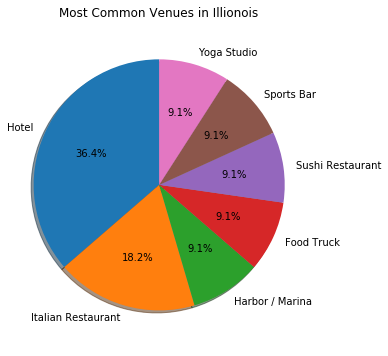

In [339]:
#Plot
# autopct create %, start angle represent starting point

import matplotlib as mpl
import matplotlib.pyplot as plt
IL_state_top_venue_Valuecount['1st Most Common Venue'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                             
                            shadow=True,       # add shadow      
                            )

plt.title('Most Common Venues in Illionois')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.axes().set_ylabel('')

plt.show()